<a href="https://colab.research.google.com/github/RafalDoroz/ai/blob/main/miary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

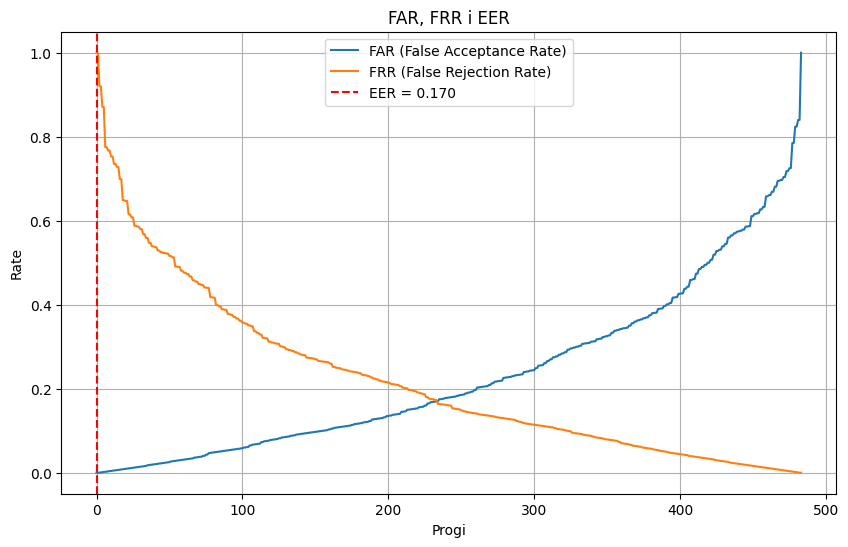

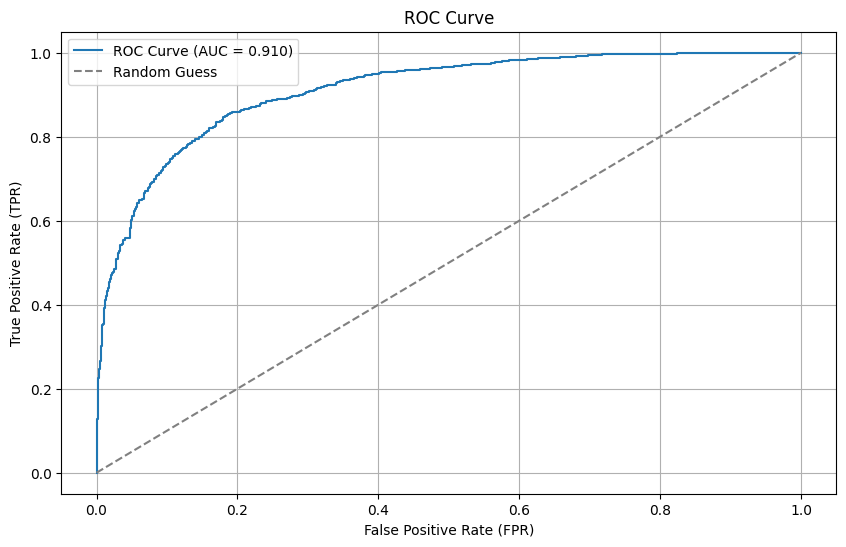

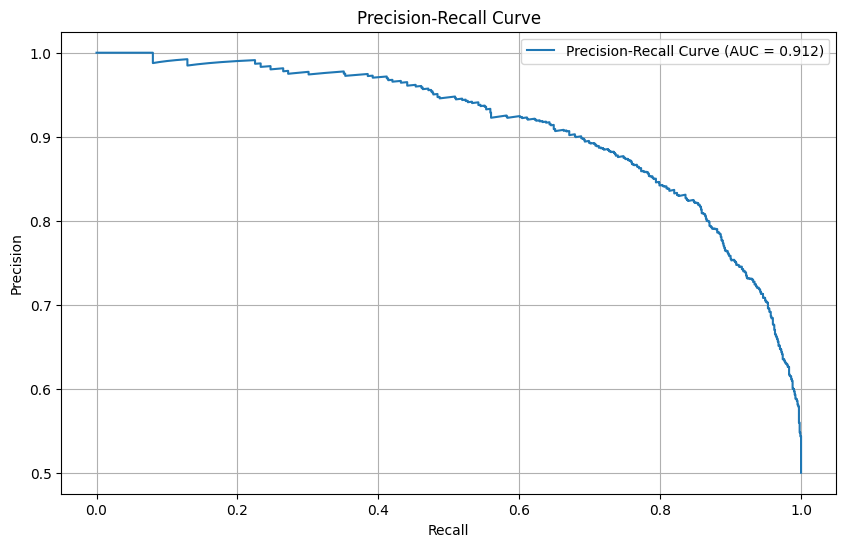

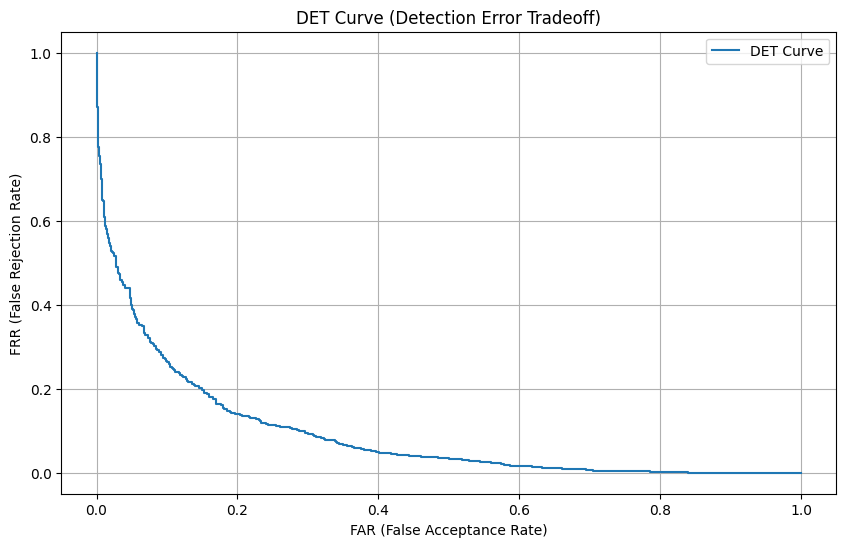

EER (Equal Error Rate): 0.170 przy progu 1.071
ROC AUC: 0.910
Precision-Recall AUC: 0.912


In [ ]:
# **1. Importowanie bibliotek i funkcji**
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, det_curve, precision_recall_curve, auc

# Funkcja symulująca dane biometryczne
def simulate_scores(n_samples=1000, separation=2):

    #"""Generuje prawdziwe i fałszywe wyniki dopasowania."""--
    genuine_scores = np.random.normal(loc=separation, scale=1, size=n_samples)  # Wyniki dopasowań prawdziwych
    impostor_scores = np.random.normal(loc=0, scale=1, size=n_samples)  # Wyniki dopasowań fałszywych
    return genuine_scores, impostor_scores

# Funkcja obliczająca metryki FAR, FRR, EER, AUC i inne
def calculate_metrics(genuine_scores, impostor_scores):
    #"""Oblicza FAR, FRR, EER, AUC, Precision-Recall i inne metryki."""
    scores = np.concatenate([genuine_scores, impostor_scores])
    labels = np.concatenate([np.ones_like(genuine_scores), np.zeros_like(impostor_scores)])

    # Krzywa ROC
    fpr, tpr, thresholds_roc = roc_curve(labels, scores)
    fnr = 1 - tpr  # False Negative Rate

    # Precision-Recall Curve
    precision, recall, thresholds_pr = precision_recall_curve(labels, scores)

    # AUC (Area Under Curve)
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall, precision)

    # Equal Error Rate (EER)
    eer_threshold = thresholds_roc[np.nanargmin(np.abs(fpr - fnr))]
    eer = fpr[np.nanargmin(np.abs(fpr - fnr))]

    return {
        "fpr": fpr,
        "fnr": fnr,
        "tpr": tpr,
        "precision": precision,
        "recall": recall,
        "thresholds_roc": thresholds_roc,
        "thresholds_pr": thresholds_pr,
        "eer": eer,
        "eer_threshold": eer_threshold,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc
    }

# Wizualizacja metryk
def plot_metrics(metrics):
    #"""Tworzy wykresy metryk oceny."""
    # FAR i FRR na jednym wykresie
    plt.figure(figsize=(10, 6))
    plt.plot(metrics["fpr"], label="FAR (False Acceptance Rate)")
    plt.plot(metrics["fnr"], label="FRR (False Rejection Rate)")
    plt.axvline(metrics["eer"], color="r", linestyle="--", label=f"EER = {metrics['eer']:.3f}")
    plt.title("FAR, FRR i EER")
    plt.xlabel("Progi")
    plt.ylabel("Rate")
    plt.legend()
    plt.grid()
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    plt.plot(metrics["fpr"], metrics["tpr"], label=f"ROC Curve (AUC = {metrics['roc_auc']:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend()
    plt.grid()
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    plt.plot(metrics["recall"], metrics["precision"], label=f"Precision-Recall Curve (AUC = {metrics['pr_auc']:.3f})")
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.grid()
    plt.show()

    # DET Curve
    plt.figure(figsize=(10, 6))
    plt.plot(metrics["fpr"], metrics["fnr"], label="DET Curve")
    plt.title("DET Curve (Detection Error Tradeoff)")
    plt.xlabel("FAR (False Acceptance Rate)")
    plt.ylabel("FRR (False Rejection Rate)")
    plt.legend()
    plt.grid()
    plt.show()

# **2. Symulacja danych biometrycznych**
# Generujemy dane symulujące wyniki dopasowania (genuine i impostor scores)
genuine_scores, impostor_scores = simulate_scores()

# **3. Obliczanie metryk**
# Obliczamy FAR, FRR, EER, AUC oraz Precision-Recall
metrics = calculate_metrics(genuine_scores, impostor_scores)

# **4. Wyświetlanie wyników**
# Wizualizujemy wyniki w formie wykresów
plot_metrics(metrics)

# Wyświetlamy wyniki tekstowe
print(f"EER (Equal Error Rate): {metrics['eer']:.3f} przy progu {metrics['eer_threshold']:.3f}")
print(f"ROC AUC: {metrics['roc_auc']:.3f}")
print(f"Precision-Recall AUC: {metrics['pr_auc']:.3f}")

# **Opis metryk:**
# 1. **FAR (False Acceptance Rate):** Odsetek błędnych akceptacji fałszywych użytkowników.
# 2. **FRR (False Rejection Rate):** Odsetek błędnych odrzuceń prawdziwych użytkowników.
# 3. **EER (Equal Error Rate):** Punkt, w którym FAR = FRR.
# 4. **ROC Curve (Receiver Operating Characteristic):** Wykres zależności pomiędzy TPR (True Positive Rate) a FPR (False Positive Rate).
# 5. **AUC (Area Under Curve):** Pole pod krzywą ROC, wskazujące ogólną skuteczność systemu.
# 6. **Precision-Recall Curve:** Relacja między precyzją a czułością dla różnych progów.
# 7. **DET Curve (Detection Error Tradeoff):** Wykres zależności między FAR a FRR, używany w analizie błędów systemów biometrycznych.
